### NIM : 241352003
### Nama : Chandra Alnando
### Kelas : Malam A

# 1. Business Understanding



## Project Domain

> Domain: Artificial Intelligence & Computer Vision

> Sub-Domain: Digit Recognition & Handwriting Analysis

Sistem klasifikasi digit tulisan tangan (Handwritten Digit Classification System) termasuk dalam bidang computer vision yang memanfaatkan machine learning untuk mengidentifikasi angka (0–9) berdasarkan tulisan tangan. Dataset MNIST digunakan secara luas sebagai benchmark untuk membangun dan menguji model klasifikasi yang mampu mengenali digit secara otomatis, yang berguna dalam berbagai aplikasi seperti pengenalan formulir, input digital, dan sistem verifikasi.

## Problem Statements

Masalah yang Dihadapi:
1. Ketidaktepatan Pengenalan Tulisan Tangan

    * Banyak sistem digital belum mampu mengenali angka tulisan tangan dengan akurat, terutama jika bentuk tulisan tidak standar atau bervariasi antar pengguna.

  * Hal ini menghambat otomatisasi dalam proses input data, seperti pengisian formulir atau koreksi ujian.

2. Ketergantungan pada Input Manual

  Pengolahan data numerik dari tulisan tangan masih sering dilakukan secara manual, memakan waktu dan rawan kesalahan, terutama dalam skala besar.

3. Kurangnya Sistem Otomatisasi yang Andal

  * Belum semua sistem mendukung pengenalan digit secara real-time dengan tingkat akurasi tinggi.

  * Sistem yang ada sering tidak cukup terlatih pada variasi gaya tulisan tangan yang beragam.


## Goals

Membangun sistem berbasis AI (Artificial Neural Network) yang dapat mengenali dan mengklasifikasikan angka tulisan tangan (0–9) secara otomatis berdasarkan input citra digital beresolusi 28x28 piksel dari dataset MNIST.

Model ini dilatih untuk mendeteksi pola visual pada angka yang ditulis tangan, memungkinkan sistem melakukan prediksi angka secara akurat tanpa perlu input manual atau pengenalan berbasis aturan eksplisit.

## Solution Statements

* Machine Learning Model <br>
Menggunakan Artificial Neural Network (ANN) untuk klasifikasi angka tulisan tangan berdasarkan dataset MNIST.
Model dilatih untuk memprediksi angka tulisan tangan dengan akurasi tinggi (>90%).

* Aplikasi Web (Streamlit) <br>
Membuat interface yang mudah digunakan bagi user untuk memasukkan angka tulisan tangan (berupa gambar) dan mendapatkan rekomendasi instan.

* Optimasi dengan TensorFlow Lite <br>
Model dikonversi ke format TFLite agar ringan dan bisa dijalankan di perangkat dengan sumber daya terbatas.

# Data Understanding

## Import Data Dari Kaggle

In [4]:
import numpy as np # linear algebra
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [5]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

## Splitting Data

In [6]:
# load dataset lalu pisahkan X dan y di awal supaya memudahkan proses
(X_train, y_train),(X_test, y_test)= keras.datasets.mnist.load_data()

In [7]:
print(X_train.shape)

print(y_test.shape)

(60000, 28, 28)
(10000,)


> Output diatas menunjukkan MNIST dataset memuat 70000 total data dalam bentuk numpy array

## Import Library yang Dibutuhkan

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report

## 2. Exploratory Data Analysis

### Distribusi Jumlah Data per Kelas

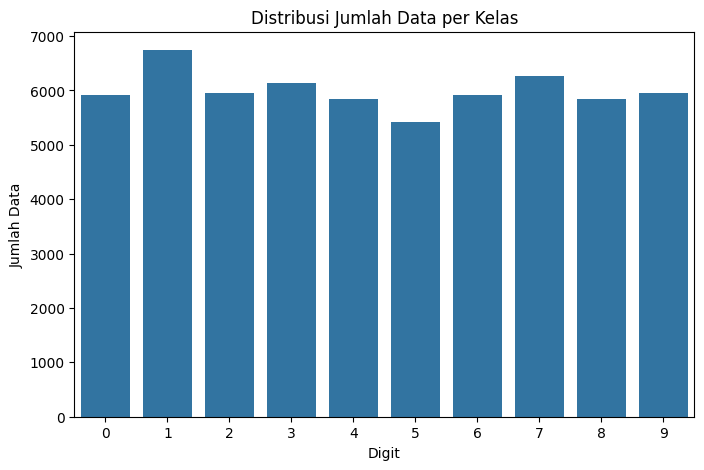

In [10]:
import seaborn as sns

# Plot distribution
plt.figure(figsize=(8, 5))
sns.countplot(x=y_train)
plt.title('Distribusi Jumlah Data per Kelas')
plt.xlabel('Digit')
plt.ylabel('Jumlah Data')
plt.show()


Berdasarkan Hasil Visualisasi diatas digit no.1 cenderung lebih mendominasi jika dibandingkan dengan digit angka lainnya

### Avarage digit per Kelas

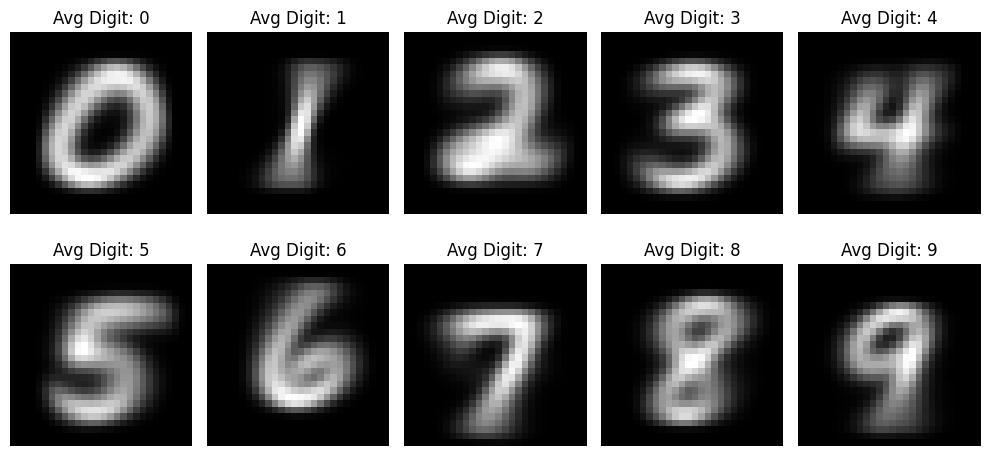

In [13]:
plt.figure(figsize=(10, 5))
for digit in range(10):
    mean_image = np.mean(X_train[y_train == digit], axis=0)
    plt.subplot(2, 5, digit + 1)
    plt.imshow(mean_image, cmap='gray')
    plt.title(f'Avg Digit: {digit}')
    plt.axis('off')

plt.tight_layout()
plt.show()


Berdasarkan hasil visualisasi diatas, grafik tersebut menunjukan pola pada setiap digitnya.

In [ ]:
# tampilan data training (pick randomly) dalam bentuk array
X_train[26]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,  30, 229,  44,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  38,  30,   0,
          0,   0,   0,   0, 181, 223,  31,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  81, 242, 113,   0,
          0,   0,   0,  57, 249, 129,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 172, 162,   0,   0,
          0,   0,   0, 136, 253,  46,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 231, 138,   0,   0,
          0,   0,   0, 162, 254,  46,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  26, 239, 137,   0,   0,
          0,   0,   0, 245, 244,  38,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 222, 148,   7,   0,
          0,   0,   0, 254, 206,   3,   7,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 138, 253, 169,  34,
          0,   0,   0, 254, 240, 191,  69,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  17, 174, 254, 255,
        169, 161, 195, 255, 254, 113,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  90, 173,
        206, 206, 223, 254,  77,   4,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  93, 254,  23,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0, 127, 254,  23,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   7, 204, 210,   9,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  24, 253, 134,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  99, 253,  51,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 149, 253,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         47, 254, 195,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         64, 253, 143,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

Karena data MNIST berupa "array", maka sulit untuk menebak angka yang dimaksud. Maka, langkah selanjutnya yakni divisualisasikan sehingga kita dapat mengenali angka yang dimaksud.

### Random visualisasi (for cek)

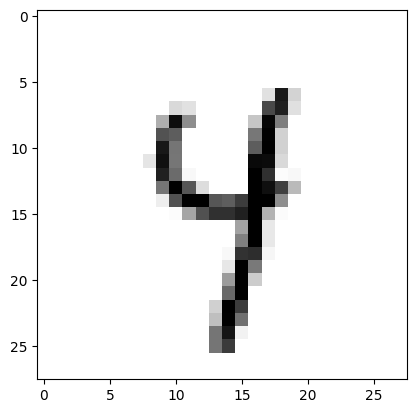

In [ ]:
plt.imshow(X_train[26], cmap= plt.cm.binary)

### Korelasi Intensitas Pixel (Heatmap Variansi Pixel)

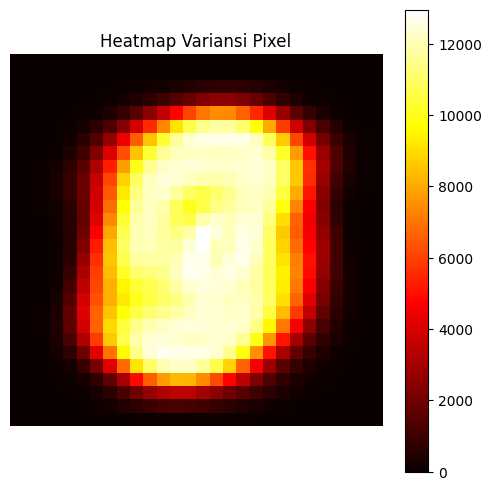

In [17]:
pixel_variance = np.var(X_train, axis=0)

plt.figure(figsize=(6, 6))
plt.imshow(pixel_variance, cmap='hot')
plt.title('Heatmap Variansi Pixel')
plt.colorbar()
plt.axis('off')
plt.show()


### Distribusi Pixel (Pixel Intensity Histogram)

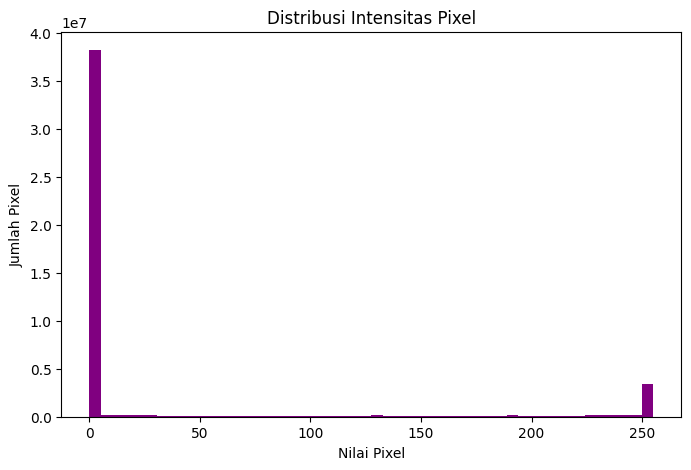

In [19]:
plt.figure(figsize=(8, 5))
plt.hist(X_train.flatten(), bins=50, color='purple')
plt.title('Distribusi Intensitas Pixel')
plt.xlabel('Nilai Pixel')
plt.ylabel('Jumlah Pixel')
plt.show()


# 3. Data Preparation

> Pada tahap ini, dicek rentang data supaya dapat mengetahui data perlu discaling atau tidak

In [ ]:
X_train[26]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,  30, 229,  44,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  38,  30,   0,
          0,   0,   0,   0, 181, 223,  31,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  81, 242, 113,   0,
          0,   0,   0,  57, 249, 129,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 172, 162,   0,   0,
          0,   0,   0, 136, 253,  46,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 231, 138,   0,   0,
          0,   0,   0, 162, 254,  46,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  26, 239, 137,   0,   0,
          0,   0,   0, 245, 244,  38,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 222, 148,   7,   0,
          0,   0,   0, 254, 206,   3,   7,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 138, 253, 169,  34,
          0,   0,   0, 254, 240, 191,  69,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  17, 174, 254, 255,
        169, 161, 195, 255, 254, 113,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  90, 173,
        206, 206, 223, 254,  77,   4,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  93, 254,  23,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0, 127, 254,  23,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   7, 204, 210,   9,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  24, 253, 134,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  99, 253,  51,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 149, 253,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         47, 254, 195,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         64, 253, 143,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

## Scaling

Dari hasil diatas, kita dapat mengetahui rentang data dari 0 sampai 255. Maka fitur (X) perlu discaling untuk meringankan komputasi ketika masuk ke tahap modeling

In [ ]:
X_trains= X_train/255
X_tests= X_test/255

Tes hasil scaling diatas untuk memastikan

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

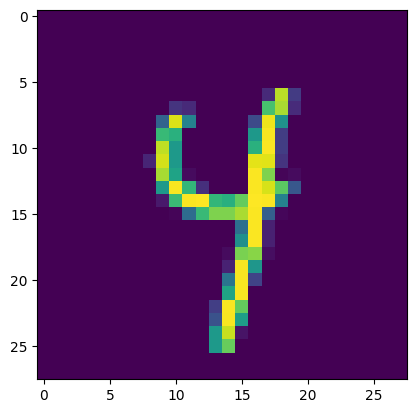

In [ ]:
print(X_trains[26])
plt.imshow(X_trains[26])

Scaling successfully

# 4. Modeling Menggunakan ANN

In [ ]:
model= Sequential()

model.add(Flatten(input_shape= (28,28)))
model.add(Dense(128, activation= 'relu'))
model.add(Dense(32, activation= 'relu'))
model.add(Dense(10, activation= 'softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics= ['accuracy'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 314,816 (1.20 MB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 209,878 (819.84 KB)

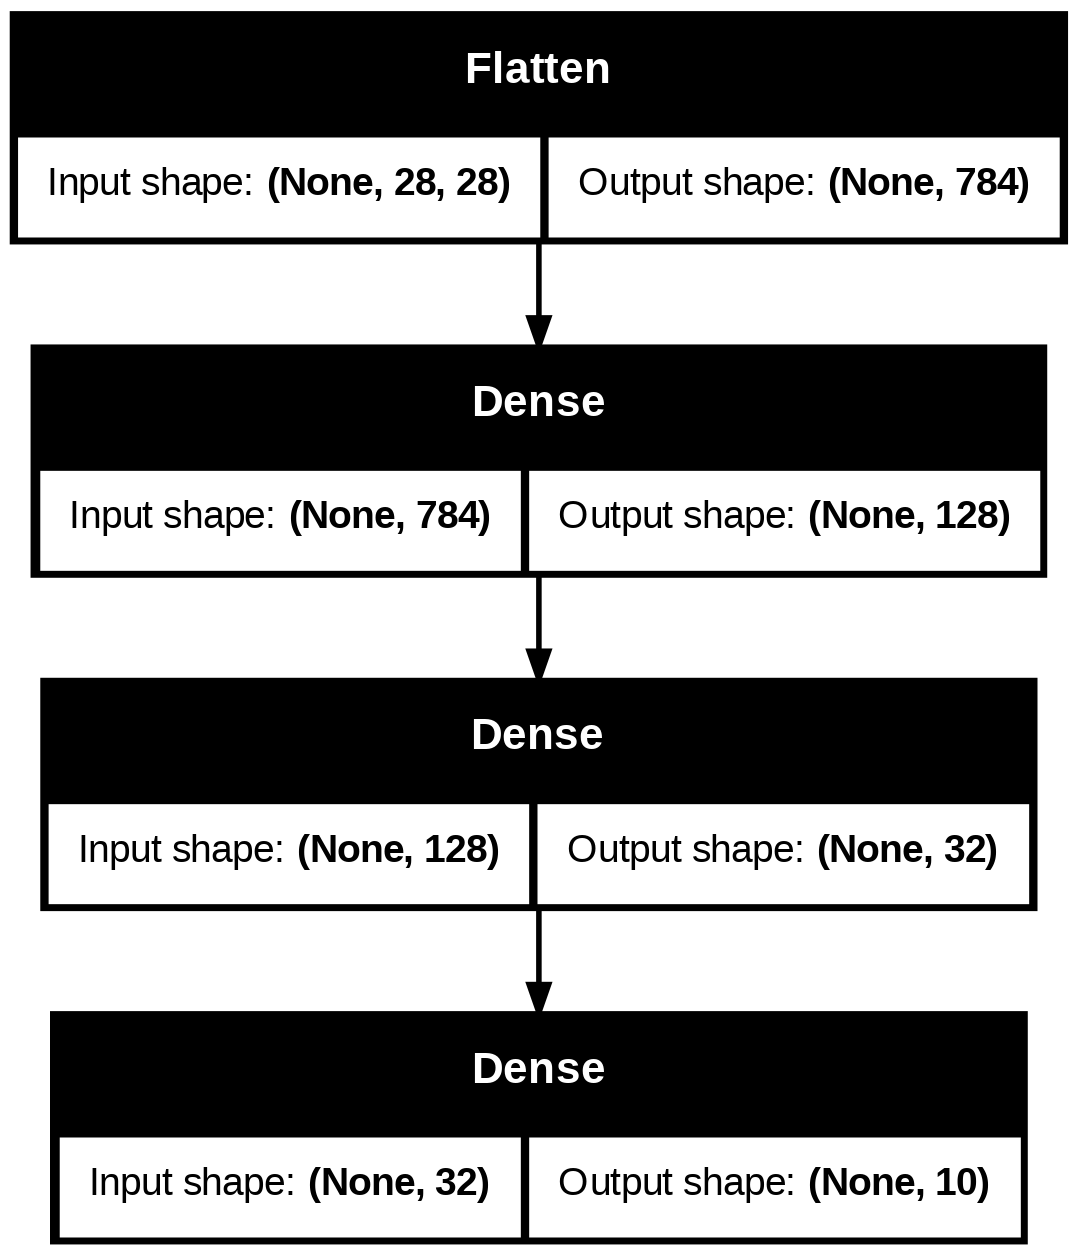

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes = True)

In [ ]:
history = model.fit(X_trains,y_train,epochs=50, validation_split=0.2)

Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9961 - loss: 0.0126 - val_accuracy: 0.9747 - val_loss: 0.1043
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9945 - loss: 0.0158 - val_accuracy: 0.9769 - val_loss: 0.1183
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9959 - loss: 0.0120 - val_accuracy: 0.9737 - val_loss: 0.1222
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9972 - loss: 0.0088 - val_accuracy: 0.9733 - val_loss: 0.1389
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9946 - loss: 0.0149 - val_accuracy: 0.9753 - val_loss: 0.1218
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9972 - loss: 0.0078 - val_accuracy: 0.9734 - val_loss: 0.1251
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9978 - loss: 0.0066 - val_accuracy: 0.9753 - val_loss: 0.1333
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9968 - loss: 0.0094 -

# 5. Evaluation

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Akurasi Model: {test_accuracy:.3f}")
print(f"Loss Model: {test_loss:.3f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9702 - loss: 73.4365
Akurasi Model: 0.975
Loss Model: 63.130


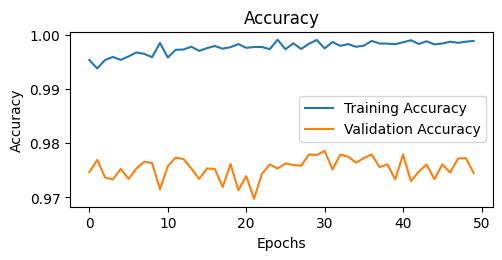

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(2, 2, 4)
plt.plot(history.history["accuracy"], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

plt.show()

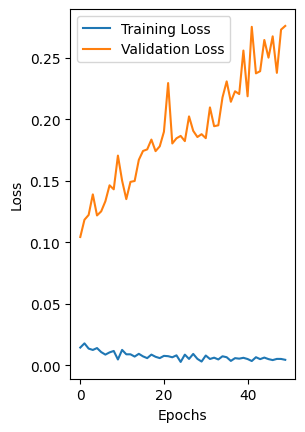

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


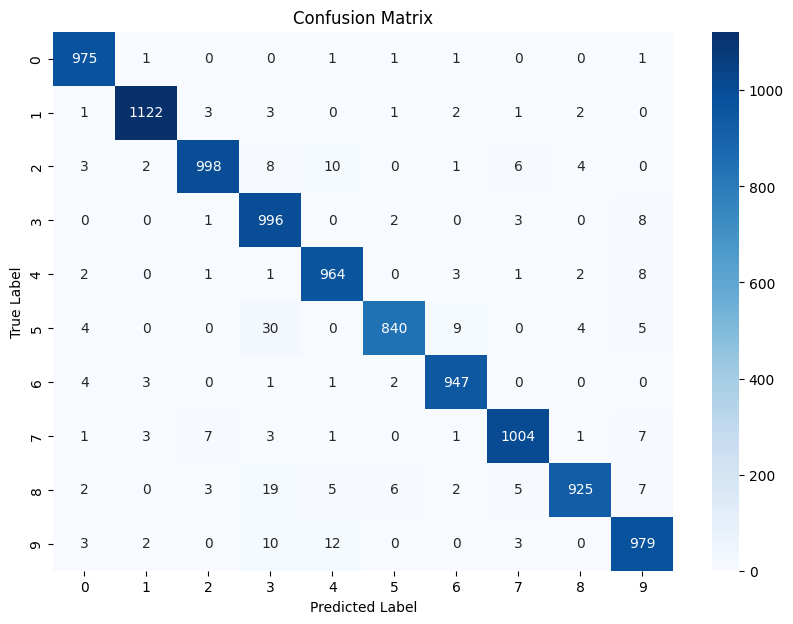

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.97      0.98      1032
           3       0.93      0.99      0.96      1010
           4       0.97      0.98      0.98       982
           5       0.99      0.94      0.96       892
           6       0.98      0.99      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.99      0.95      0.97       974
           9       0.96      0.97      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.98      0.97      0.97     10000
weighted avg       0.98      0.97      0.98     10000



In [ ]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred_classes))

# Deployment

## Model Simulation

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

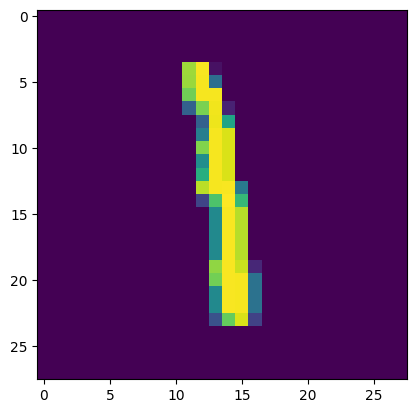

In [ ]:
print(X_tests[29])
plt.imshow(X_tests[29])

In [ ]:
# randomly picked from data testing ke-30
sample_input = X_tests[29]
# Ubah bentuk data sampel agar punya dimensi batch
sample_input = sample_input.reshape(1, 28, 28)

In [ ]:
predicted_handwritten = np.argmax(model.predict(sample_input))

print(f"Hasil prediksi angka: {predicted_handwritten}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Hasil prediksi angka: 1


## Save Model

In [ ]:
# Konversi model ke TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Simpan model
with open('number_recommendation.tflite', 'wb') as f:
    f.write(tflite_model)

Saved artifact at '/tmp/tmpuh_7ceip'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28, 28), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  134200961367696: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134200961367312: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134200961365968: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134200961366736: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134200564518352: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134200564519120: TensorSpec(shape=(), dtype=tf.resource, name=None)
